In [3]:
# Dependencies

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from config import g_key
import requests
import gmaps
import gmaps.geojson_geometries

In [4]:
# path to clean file with data
clean_file = 'Resources/HomeValue_clean.csv'

#read file to DataFrame
homes_value_orig_df = pd.read_csv(clean_file)

In [5]:
homes_value_orig_df.head()

,County,State,Home Type,Avg house price
0,Los Angeles,CA,4 bedroom,722251.25
1,San Diego,CA,4 bedroom,698838.33
2,Orange,CA,4 bedroom,860278.42
3,Riverside,CA,4 bedroom,448650.92
4,San Bernardino,CA,4 bedroom,444484.50


In [6]:
homes_value_orig_df['Home Type'].unique()

array(['4 bedroom', 'single family', '1 bedroom', '2 bedroom', 'condo',
       '5 bedroom'], dtype=object)

In [7]:
# choose data for each home type
one_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '1 bedroom']
one_bedroom = one_bedroom.sort_values('Avg house price')

two_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '2 bedroom']
two_bedroom = two_bedroom.sort_values('Avg house price')

three_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '3 bedroom']
three_bedroom = three_bedroom.sort_values('Avg house price')

four_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '4 bedroom']
four_bedroom = four_bedroom.sort_values('Avg house price')

five_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '5 bedroom']
five_bedroom = five_bedroom.sort_values('Avg house price')

condo = homes_value_orig_df[homes_value_orig_df['Home Type'] == 'condo']
condo = condo.sort_values('Avg house price')

# df with cheapest house price
cheapest_place_ca = one_bedroom.head(10) 
cheapest_place_ca = pd.concat([cheapest_place_ca, two_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, three_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, four_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, five_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, condo.head(10)], ignore_index=True)

# df with most expensive price
expensive_place_ca = one_bedroom.tail(10) 
expensive_place_ca = pd.concat([expensive_place_ca, two_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, three_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, four_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, five_bedroom.tail(10)], ignore_index=True)
expensive_place_ca = pd.concat([expensive_place_ca, condo.tail(10)], ignore_index=True)

### 1. What is the most dangerous and safest place to live in California according to the crime rate for the population and type of crimes in that county?

In [ ]:
#Crime Table
CrimeData = "C:\\Users\\mgeam\\BestCityToLiveCA\\CrimeRates.csv"
open(CrimeData)
os.path.exists(CrimeData)
CrimeTable = pd.read_csv(CrimeData)

In [ ]:
#Population Table
PopData = "C:\\Users\\mgeam\\BestCityToLiveCA\\Resources\\CrimeData\\CountyPopulation.csv"
open(PopData)
os.path.exists(PopData)
PopTable = pd.read_csv(PopData)
CleanPopTable = PopTable.dropna(axis='rows')
CleanerPopTable = ViolentCrime = CleanPopTable.drop([113, 114, 115, 116, 117])
CleanestPopTable = CleanerPopTable.set_index('County')
IntPopTable = CleanestPopTable.apply(pd.to_numeric, errors='coerce')


In [ ]:
#Violent Crime Table
ViolentCrime = CrimeTable.drop([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del ViolentCrime['Crimes']
TransposeViolentCrime = ViolentCrime.T
ViolentCrimeTable = TransposeViolentCrime.sort_values(by=[0])
MergeViolentCrimeTable = ViolentCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergeViolentCrimeTable['Violent Crime Rate'] = MergeViolentCrimeTable[0]/IntPopTable['Population']
FinalViolentCrimeRateTable = MergeViolentCrimeTable.sort_values(by=['Violent Crime Rate'])
FinalViolentCrimeRateTable['Violent Crime Rate'] = FinalViolentCrimeRateTable['Violent Crime Rate'].map("{:.2%}".format)

#Property Crime Table
PropertyCrime = CrimeTable.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
del PropertyCrime['Crimes']
TransposePropertyCrime = PropertyCrime.T
PropertyCrimeTable = TransposePropertyCrime.sort_values(by=[11])
MergePropertyCrimeTable = PropertyCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergePropertyCrimeTable['Property Crime Rate'] = MergePropertyCrimeTable[11]/IntPopTable['Population']
FinalPropertyCrimeTable = MergePropertyCrimeTable.sort_values(by=['Property Crime Rate'])
FinalPropertyCrimeTable['Property Crime Rate'] = FinalPropertyCrimeTable['Property Crime Rate'].map("{:.2%}".format)

#All Crime Rate 
AllCrimeTable = PropertyCrimeTable.merge(TransposeViolentCrime, left_index=True, right_index=True)
MergeAllCrimeTable = AllCrimeTable.merge(IntPopTable, left_index=True, right_index=True)
MergeAllCrimeTable['Crime Rate'] = (MergeAllCrimeTable[11] + MergeAllCrimeTable[0])/IntPopTable['Population']
AllCrimeRateTable = MergeAllCrimeTable.sort_values(['Crime Rate'], ascending=False)
AllCrimeRateTable['Crime Rate'] = AllCrimeRateTable['Crime Rate'].map("{:.2%}".format)
AllCrimeRateTable['Crime Rank'] = AllCrimeRateTable['Crime Rate'].rank(method='max')
AllCrimeRateTable=AllCrimeRateTable.rename(columns={11: 'Property Crime'})
AllCrimeRateTable=AllCrimeRateTable.rename(columns={0: 'Violent Crime'})
 

In [ ]:
#one_bedroom=one_bedroom.set_index('County')
one_bedroom['Price Rank'] = one_bedroom['Avg house price'].rank(method='max')
OneBedCrimeAndRent=AllCrimeRateTable.merge(one_bedroom, left_index=True, right_index=True)
OneBedCrimeAndRent= OneBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
OneBedCrimeAndRent=OneBedCrimeAndRent.reset_index()
OneBedCrimeAndRent=OneBedCrimeAndRent.rename(columns={'index': 'County'})
OneBedCrimeAndRent=OneBedCrimeAndRent.drop('State', axis =1)
OneBedCrimeAndRent['Rank']=(OneBedCrimeAndRent['Crime Rank']+OneBedCrimeAndRent['Price Rank'])/2
OneBedCrimeAndRent['Rank']= OneBedCrimeAndRent['Rank'].rank(method='max')
OneBedCrimeAndRent['Percentile Rank'] = OneBedCrimeAndRent['Rank'].rank(pct=True)
OneBedCrimeAndRent.head()

In [ ]:
ax = OneBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
OneBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('One Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('One Bedroom Price Rank')
plt.show()


In [ ]:
#two_bedroom=two_bedroom.set_index('County')
two_bedroom['Price Rank'] = two_bedroom['Avg house price'].rank(method='max')
TwoBedCrimeAndRent=AllCrimeRateTable.merge(two_bedroom, left_index=True, right_index=True)
TwoBedCrimeAndRent= TwoBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
TwoBedCrimeAndRent=TwoBedCrimeAndRent.reset_index()
TwoBedCrimeAndRent=TwoBedCrimeAndRent.rename(columns={'index': 'County'})
TwoBedCrimeAndRent=TwoBedCrimeAndRent.drop('State', axis =1)
TwoBedCrimeAndRent['Rank']=(TwoBedCrimeAndRent['Crime Rank']+TwoBedCrimeAndRent['Price Rank'])/2
TwoBedCrimeAndRent['Rank']= TwoBedCrimeAndRent['Rank'].rank(method='max')
TwoBedCrimeAndRent['Percentile Rank'] = TwoBedCrimeAndRent['Rank'].rank(pct=True)
TwoBedCrimeAndRent.head()

In [ ]:
ax = TwoBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
TwoBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Two Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('Two Bedroom Price Rank')
plt.show()

In [ ]:
#four_bedroom=four_bedroom.set_index('County')
four_bedroom['Price Rank'] = four_bedroom['Avg house price'].rank(method='max')
FourBedCrimeAndRent=AllCrimeRateTable.merge(four_bedroom, left_index=True, right_index=True)
FourBedCrimeAndRent=FourBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
FourBedCrimeAndRent=FourBedCrimeAndRent.reset_index()
FourBedCrimeAndRent=FourBedCrimeAndRent.rename(columns={'index': 'County'})
FourBedCrimeAndRent=FourBedCrimeAndRent.drop('State', axis =1)
FourBedCrimeAndRent['Rank']=(FourBedCrimeAndRent['Crime Rank']+FourBedCrimeAndRent['Price Rank'])/2
FourBedCrimeAndRent['Rank']= FourBedCrimeAndRent['Rank'].rank(method='max')
FourBedCrimeAndRent['Percentile Rank'] = FourBedCrimeAndRent['Rank'].rank(pct=True)
FourBedCrimeAndRent.head()


In [ ]:
ax = FourBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
FourBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Four Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('Four Bedroom Price Rank')
plt.show()

In [ ]:
#five_bedroom=five_bedroom.set_index('County')
five_bedroom['Price Rank'] = five_bedroom['Avg house price'].rank(method='max')
FiveBedCrimeAndRent=AllCrimeRateTable.merge(five_bedroom, left_index=True, right_index=True)
FiveBedCrimeAndRent=FiveBedCrimeAndRent.sort_values(['Avg house price'], ascending=False)
FiveBedCrimeAndRent=FiveBedCrimeAndRent.reset_index()
FiveBedCrimeAndRent=FiveBedCrimeAndRent.rename(columns={'index': 'County'})
FiveBedCrimeAndRent=FiveBedCrimeAndRent.drop('State', axis =1)
FiveBedCrimeAndRent['Rank']=(FiveBedCrimeAndRent['Crime Rank']+FiveBedCrimeAndRent['Price Rank'])/2
FiveBedCrimeAndRent['Rank']= FiveBedCrimeAndRent['Rank'].rank(method='max')
FiveBedCrimeAndRent['Percentile Rank'] = FiveBedCrimeAndRent['Rank'].rank(pct=True)
FiveBedCrimeAndRent.head()



In [ ]:
ax = FiveBedCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
FiveBedCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Five Bedroom Crime/Property Price Comparison Chart')
plt.ylabel('Five Bedroom Price Rank')
plt.show()

In [ ]:
#condo=condo.set_index('County')
condo['Price Rank'] = condo['Avg house price'].rank(method='max')
CondoCrimeAndRent=AllCrimeRateTable.merge(condo, left_index=True, right_index=True)
CondoCrimeAndRent=CondoCrimeAndRent.sort_values(['Avg house price'], ascending=False)
CondoCrimeAndRent=CondoCrimeAndRent.reset_index()
CondoCrimeAndRent=CondoCrimeAndRent.rename(columns={'index': 'County'})
CondoCrimeAndRent=CondoCrimeAndRent.drop('State', axis =1)
CondoCrimeAndRent['Rank']=(CondoCrimeAndRent['Crime Rank']+CondoCrimeAndRent['Price Rank'])/2
CondoCrimeAndRent['Rank']= CondoCrimeAndRent['Rank'].rank(method='max')
CondoCrimeAndRent['Percentile Rank'] = CondoCrimeAndRent['Rank'].rank(pct=True)
CondoCrimeAndRent.


In [ ]:
ax = CondoCrimeAndRent[['County', 'Crime Rank']].plot( x='County', linestyle='-', marker='o', color='b')
CondoCrimeAndRent[['County', 'Price Rank']].plot(x='County', kind='bar', ax=ax, figsize=(20,10), color='y')
plt.title('Condo Crime/Property Price Comparison Chart')
plt.ylabel('Condo Price Rank')
plt.show()

### 2. Which county is the most cost-effective place to live in California and crime rate in this areas?

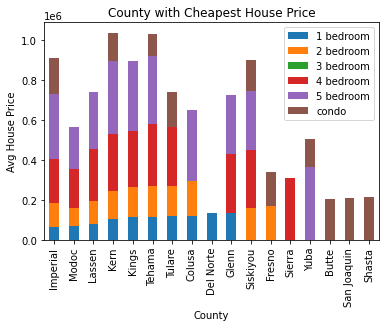

In [8]:
cheapest_1bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '1 bedroom', ['County', 'Avg house price']]
cheapest_2bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '2 bedroom', ['County', 'Avg house price']]
cheapest_3bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '3 bedroom', ['County', 'Avg house price']]
cheapest_4bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '4 bedroom', ['County', 'Avg house price']]
cheapest_5bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '5 bedroom', ['County', 'Avg house price']]
cheapest_condo = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == 'condo', ['County', 'Avg house price']]

cheap_plot = cheapest_1bd.merge(cheapest_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
cheap_plot = cheap_plot.merge(cheapest_3bd, on='County', how='outer')

cheap_plot = cheap_plot.merge(cheapest_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
cheap_plot = cheap_plot.merge(cheapest_5bd, on='County', how='outer')
cheap_plot = cheap_plot.merge(cheapest_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

cheap_plot = cheap_plot.set_index('County')
cheap_plot = cheap_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})

cheap_plot.plot(kind='bar', stacked=True)

plt.title("County with Cheapest House Price")
plt.ylabel("Avg House Price")
plt.savefig('Outcome/County with Cheapest House Price', dpi=300, bbox_inches='tight')
plt.show()



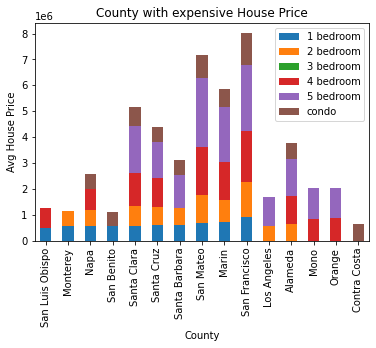

In [9]:
# Most expensive paces in CA
expensive_1bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '1 bedroom', ['County', 'Avg house price']]
expensive_2bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '2 bedroom', ['County', 'Avg house price']]
expensive_3bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '3 bedroom', ['County', 'Avg house price']]
expensive_4bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '4 bedroom', ['County', 'Avg house price']]
expensive_5bd = expensive_place_ca.loc[expensive_place_ca['Home Type'] == '5 bedroom', ['County', 'Avg house price']]
expensive_condo = expensive_place_ca.loc[expensive_place_ca['Home Type'] == 'condo', ['County', 'Avg house price']]

expensive_plot = expensive_1bd.merge(expensive_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
expensive_plot = expensive_plot.merge(expensive_3bd, on='County', how='outer')

expensive_plot = expensive_plot.merge(expensive_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
expensive_plot = expensive_plot.merge(expensive_5bd, on='County', how='outer')
expensive_plot = expensive_plot.merge(expensive_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

expensive_plot = expensive_plot.set_index('County')
expensive_plot = expensive_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})

expensive_plot.plot(kind='bar', stacked=True)

plt.title("County with expensive House Price")
plt.ylabel("Avg House Price")

plt.savefig('Outcome/County with Highest House Price', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
all_county = one_bedroom.merge(two_bedroom, on='County', how='outer', suffixes=('_1bd', '_2bd'))
all_county = all_county.merge(three_bedroom, on='County', how='outer')
all_county = all_county.merge(four_bedroom, on='County', how='outer', suffixes=('_3bd', '_4bd'))
all_county = all_county.merge(five_bedroom, on='County', how='outer')
all_county = all_county.merge(condo, on='County', how='outer', suffixes=('_5bd', '_condo'))
all_county = all_county.filter(regex=r'County|Avg house price')
all_county.head(2)

In [ ]:
all_county['lat'] = ''
all_county['lng'] = ''

all_county.head(2)

In [ ]:
base_url = 'https://maps.googleapis.com/maps/api/geocode/json?'

In [ ]:
#Get coord for all county

for county in list(all_county['County']):
    target_url = base_url + ('address={0}&key={1}').format(county + ', CA', g_key)
    get_geodata = requests.get(target_url).json()

    all_county.loc[all_county['County'] == county, ['lat']] = get_geodata['results'][0]['geometry']['location']['lat']
    all_county.loc[all_county['County'] == county, ['lng']] = get_geodata['results'][0]['geometry']['location']['lng']

all_county

In [ ]:
# cheapest county location
cheap_plot = cheap_plot.reset_index()

cheapest_county = pd.DataFrame(cheap_plot['County'])
cheapest_county['lat'] = ''
cheapest_county['lng'] = ''


for county in list(cheapest_county['County']):
    target_url = base_url + ('address={0}&key={1}').format(county+', CA', g_key)
    get_geodata = requests.get(target_url).json()

    cheapest_county.loc[cheapest_county['County'] == county, ['lat']] = get_geodata['results'][0]['geometry']['location']['lat']
    cheapest_county.loc[cheapest_county['County'] == county, ['lng']] = get_geodata['results'][0]['geometry']['location']['lng']
        

In [ ]:
# get all location as float
cheap_location = cheapest_county[['lat', 'lng']].astype(float)

#configure gmaps
gmaps.configure(api_key=g_key)

In [ ]:
# Map with county boundaries
gmaps.geojson_geometries.list_geometries()

countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

marker_layer = gmaps.marker_layer(cheap_location)

fig = gmaps.figure()

geojson_layer = gmaps.geojson_layer(countries_geojson)
fig.add_layer(geojson_layer)
fig.add_layer(marker_layer)
fig

In [ ]:
max_house_value = homes_value_orig_df['Avg house price'].max()
min_house_value = homes_value_orig_df['Avg house price'].min()

max_house_value

### House for any budget

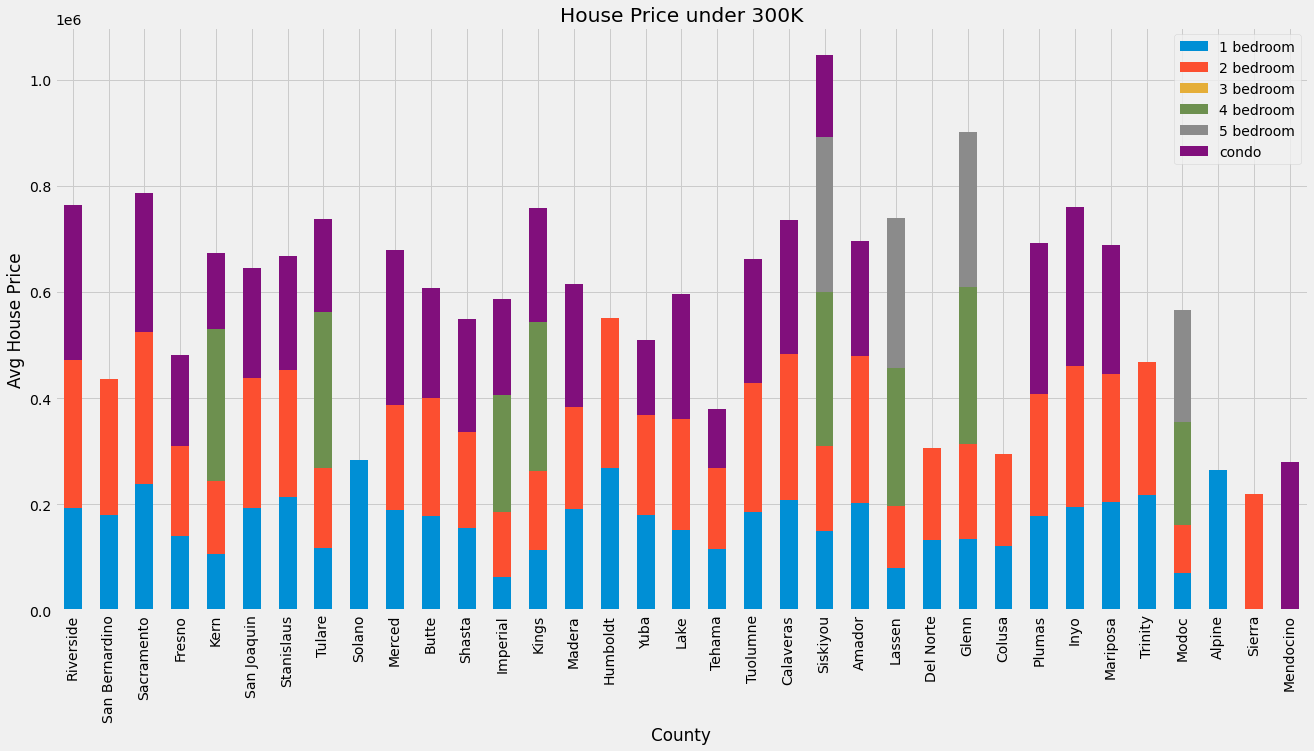

In [10]:
# Under 300 000
#under_300 = homes_value_orig_df[homes_value_orig_df['Avg house price'] < 300000 & ]


under300_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]
under300_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') & (homes_value_orig_df['Avg house price'] < 300000), ['County', 'Avg house price']]

under300_plot = under300_1bd.merge(under300_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under300_plot = under300_plot.merge(under300_3bd, on='County', how='outer')

under300_plot = under300_plot.merge(under300_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under300_plot = under300_plot.merge(under300_5bd, on='County', how='outer')
under300_plot = under300_plot.merge(under300_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under300_plot = under300_plot.set_index('County')
under300_plot = under300_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under300_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("House Price under 300K")
plt.ylabel("Avg House Price")

plt.savefig('Outcome/House Price under 300K', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
under300_plot = under300_plot.reset_index()
under300_plot['lat'] = ''
under300_plot['lng'] = ''


for county in list(under300_plot['County']):
    target_url = base_url + ('address={0}&key={1}').format(county+', CA', g_key)
    get_geodata = requests.get(target_url).json()

    under300_plot.loc[under300_plot['County'] == county, ['lat']] = get_geodata['results'][0]['geometry']['location']['lat']
    under300_plot.loc[under300_plot['County'] == county, ['lng']] = get_geodata['results'][0]['geometry']['location']['lng']
        




# get all location as float
under300_location = under300_plot[['lat', 'lng']].astype(float)

# Map with county boundaries
gmaps.geojson_geometries.list_geometries()

countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

marker_layer = gmaps.marker_layer(under300_location)

fig = gmaps.figure()

geojson_layer = gmaps.geojson_layer(countries_geojson)
fig.add_layer(geojson_layer)
fig.add_layer(marker_layer)
fig

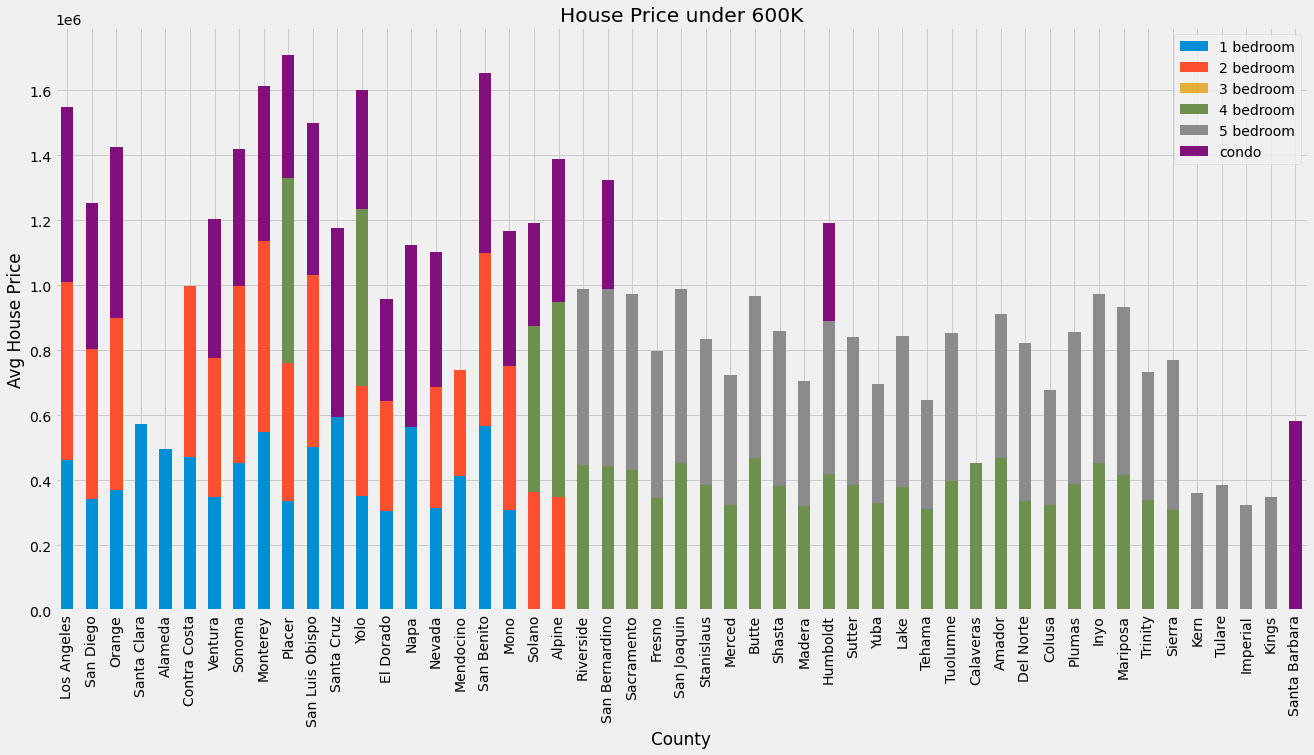

In [11]:
# between 300,000 and 600,000
under600_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 300000) 
                                       & (homes_value_orig_df['Avg house price'] < 600000)
                                       , ['County', 'Avg house price']]

under600_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 300000) 
                                         & (homes_value_orig_df['Avg house price'] < 600000)
                                         , ['County', 'Avg house price']]

under600_plot = under600_1bd.merge(under600_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under600_plot = under600_plot.merge(under600_3bd, on='County', how='outer')

under600_plot = under600_plot.merge(under600_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under600_plot = under600_plot.merge(under600_5bd, on='County', how='outer')
under600_plot = under600_plot.merge(under600_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under600_plot = under600_plot.set_index('County')
under600_plot = under600_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under600_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("House Price under 600K")
plt.ylabel("Avg House Price")

plt.savefig('Outcome/House Price under 600K', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
under600_plot = under600_plot.reset_index()
under600_plot['lat'] = ''
under600_plot['lng'] = ''


for county in list(under600_plot['County']):
    target_url = base_url + ('address={0}&key={1}').format(county+', CA', g_key)
    get_geodata = requests.get(target_url).json()

    under600_plot.loc[under600_plot['County'] == county, ['lat']] = get_geodata['results'][0]['geometry']['location']['lat']
    under600_plot.loc[under600_plot['County'] == county, ['lng']] = get_geodata['results'][0]['geometry']['location']['lng']
        




# get all location as float
under600_location = under600_plot[['lat', 'lng']].astype(float)

# Map with county boundaries
gmaps.geojson_geometries.list_geometries()

countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

marker_layer = gmaps.marker_layer(under600_location)

fig = gmaps.figure()

geojson_layer = gmaps.geojson_layer(countries_geojson)
fig.add_layer(geojson_layer)
fig.add_layer(marker_layer)
fig

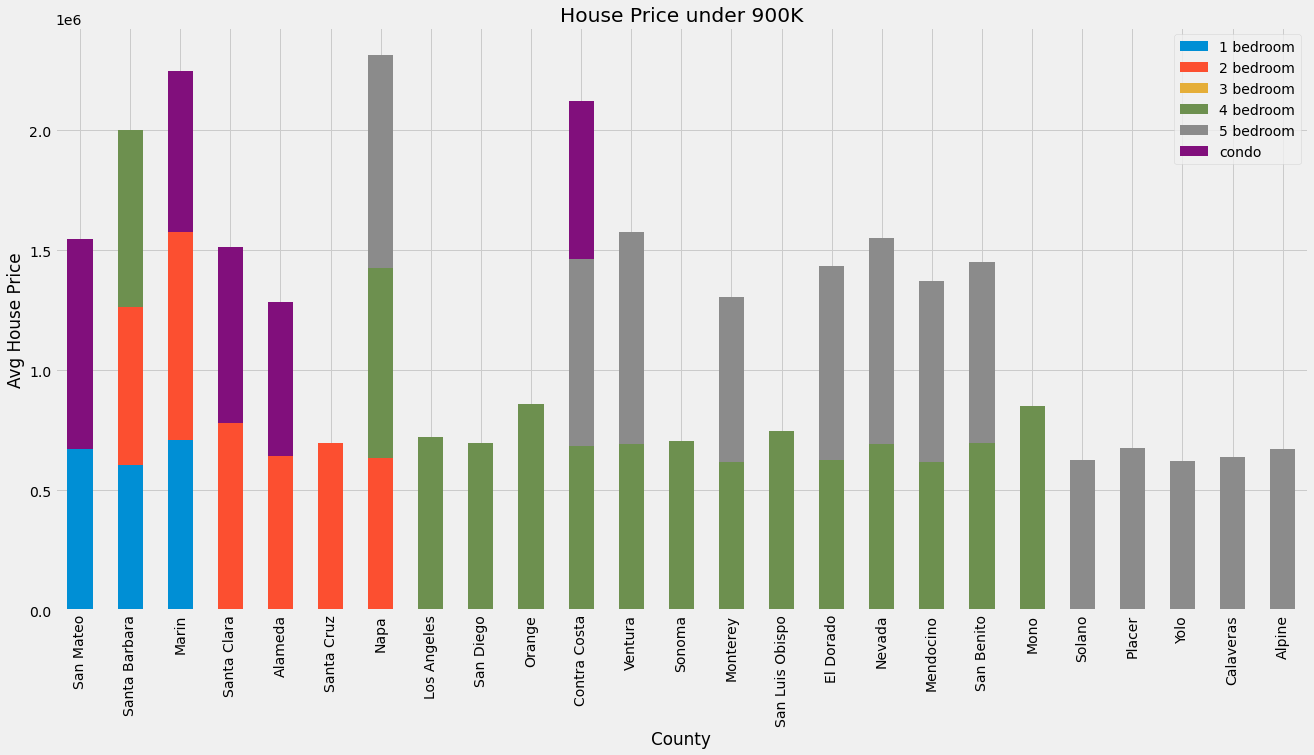

In [12]:
# between 600,000 and 900,000
under900_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 600000) 
                                       & (homes_value_orig_df['Avg house price'] < 900000)
                                       , ['County', 'Avg house price']]

under900_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 600000) 
                                         & (homes_value_orig_df['Avg house price'] < 900000)
                                         , ['County', 'Avg house price']]

under900_plot = under900_1bd.merge(under900_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under900_plot = under900_plot.merge(under900_3bd, on='County', how='outer')

under900_plot = under900_plot.merge(under900_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under900_plot = under900_plot.merge(under900_5bd, on='County', how='outer')
under900_plot = under900_plot.merge(under900_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under900_plot = under900_plot.set_index('County')
under900_plot = under900_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under900_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("House Price under 900K")
plt.ylabel("Avg House Price")

plt.savefig('Outcome/House Price under 900K', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
under900_plot = under900_plot.reset_index()
under900_plot['lat'] = ''
under900_plot['lng'] = ''


for county in list(under900_plot['County']):
    target_url = base_url + ('address={0}&key={1}').format(county+', CA', g_key)
    get_geodata = requests.get(target_url).json()

    under900_plot.loc[under900_plot['County'] == county, ['lat']] = get_geodata['results'][0]['geometry']['location']['lat']
    under900_plot.loc[under900_plot['County'] == county, ['lng']] = get_geodata['results'][0]['geometry']['location']['lng']
        




# get all location as float
under900_location = under900_plot[['lat', 'lng']].astype(float)

# Map with county boundaries
gmaps.geojson_geometries.list_geometries()

countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

marker_layer = gmaps.marker_layer(under900_location)

fig = gmaps.figure()

geojson_layer = gmaps.geojson_layer(countries_geojson)
fig.add_layer(geojson_layer)
fig.add_layer(marker_layer)
fig

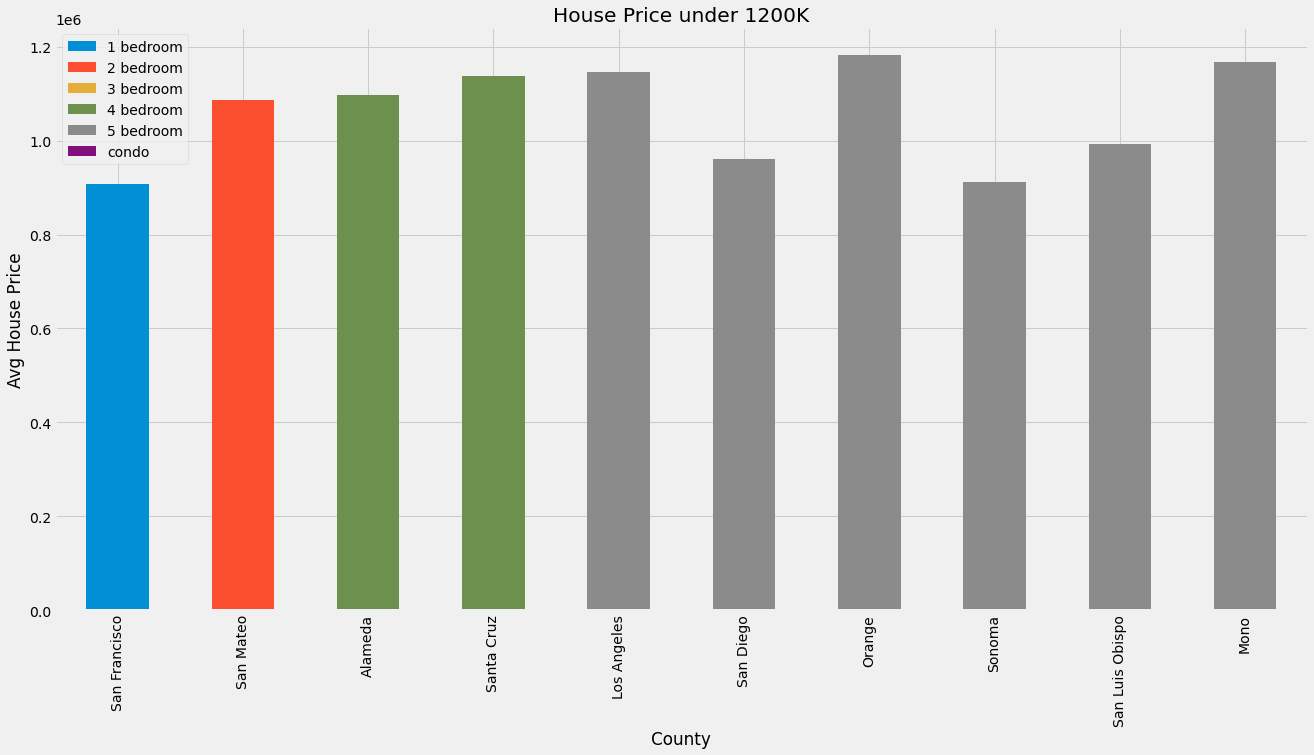

In [13]:
# between 900,000 and 1 200,000
under1100_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 900000) 
                                       & (homes_value_orig_df['Avg house price'] < 1200000)
                                       , ['County', 'Avg house price']]

under1100_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 900000) 
                                         & (homes_value_orig_df['Avg house price'] < 1200000)
                                         , ['County', 'Avg house price']]

under1100_plot = under1100_1bd.merge(under1100_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under1100_plot = under1100_plot.merge(under1100_3bd, on='County', how='outer')

under1100_plot = under1100_plot.merge(under1100_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under1100_plot = under1100_plot.merge(under1100_5bd, on='County', how='outer')
under1100_plot = under1100_plot.merge(under1100_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under1100_plot = under1100_plot.set_index('County')
under1100_plot = under1100_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under1100_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("House Price under 1200K")
plt.ylabel("Avg House Price")

plt.savefig('Outcome/House Price under 1200K', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
under1100_plot = under1100_plot.reset_index()
under1100_plot['lat'] = ''
under1100_plot['lng'] = ''


for county in list(under1100_plot['County']):
    target_url = base_url + ('address={0}&key={1}').format(county+', CA', g_key)
    get_geodata = requests.get(target_url).json()

    under1100_plot.loc[under1100_plot['County'] == county, ['lat']] = get_geodata['results'][0]['geometry']['location']['lat']
    under1100_plot.loc[under1100_plot['County'] == county, ['lng']] = get_geodata['results'][0]['geometry']['location']['lng']
        




# get all location as float
under1100_location = under1100_plot[['lat', 'lng']].astype(float)

# Map with county boundaries
gmaps.geojson_geometries.list_geometries()

countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

marker_layer = gmaps.marker_layer(under1100_location)

fig = gmaps.figure()

geojson_layer = gmaps.geojson_layer(countries_geojson)
fig.add_layer(geojson_layer)
fig.add_layer(marker_layer)
fig

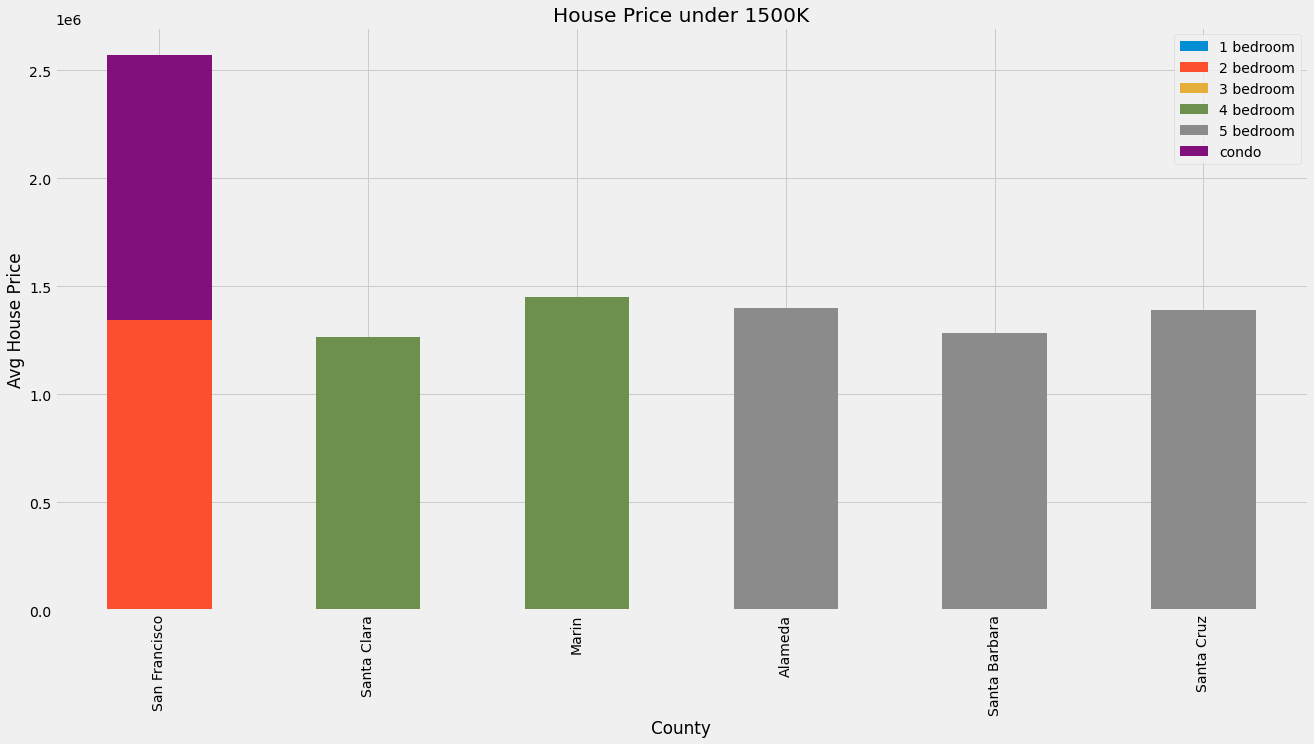

In [14]:
# between 1 200,000 and 1 500,000
under1500_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1200000) 
                                       & (homes_value_orig_df['Avg house price'] < 1500000)
                                       , ['County', 'Avg house price']]

under1500_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 1200000) 
                                         & (homes_value_orig_df['Avg house price'] < 1500000)
                                         , ['County', 'Avg house price']]

under1500_plot = under1500_1bd.merge(under1500_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
under1500_plot = under1500_plot.merge(under1500_3bd, on='County', how='outer')

under1500_plot = under1500_plot.merge(under1500_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
under1500_plot = under1500_plot.merge(under1500_5bd, on='County', how='outer')
under1500_plot = under1500_plot.merge(under1500_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

under1500_plot = under1500_plot.set_index('County')
under1500_plot = under1500_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
under1500_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("House Price under 1500K")
plt.ylabel("Avg House Price")

plt.savefig('Outcome/House Price under 1500K', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:

under1500_plot = under1500_plot.reset_index()
under1500_plot['lat'] = ''
under1500_plot['lng'] = ''


for county in list(under1500_plot['County']):
    target_url = base_url + ('address={0}&key={1}').format(county+', CA', g_key)
    get_geodata = requests.get(target_url).json()

    under1500_plot.loc[under1500_plot['County'] == county, ['lat']] = get_geodata['results'][0]['geometry']['location']['lat']
    under1500_plot.loc[under1500_plot['County'] == county, ['lng']] = get_geodata['results'][0]['geometry']['location']['lng']
        




# get all location as float
under1500_location = under1500_plot[['lat', 'lng']].astype(float)

# Map with county boundaries
gmaps.geojson_geometries.list_geometries()

countries_geojson = gmaps.geojson_geometries.load_geometry('us-counties')

marker_layer = gmaps.marker_layer(under1500_location)

fig = gmaps.figure()

geojson_layer = gmaps.geojson_layer(countries_geojson)
fig.add_layer(geojson_layer)
fig.add_layer(marker_layer)
fig

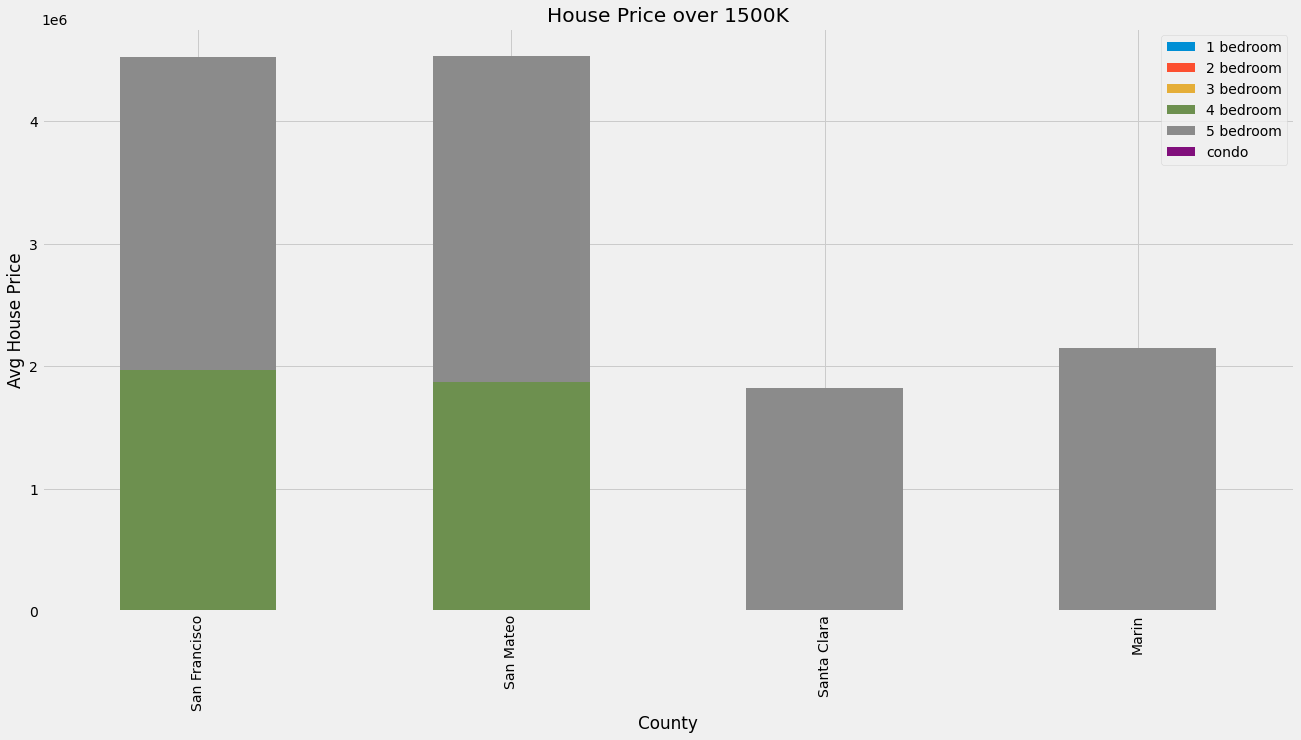

In [15]:
# more than 1 500,000
over1500_1bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '1 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1500000)
                                       , ['County', 'Avg house price']]

over1500_2bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '2 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1500000)
                                       , ['County', 'Avg house price']]

over1500_3bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '3 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1500000)
                                       , ['County', 'Avg house price']]

over1500_4bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '4 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1500000)
                                       , ['County', 'Avg house price']]

over1500_5bd = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == '5 bedroom') 
                                       & (homes_value_orig_df['Avg house price'] > 1500000)
                                       , ['County', 'Avg house price']]

over1500_condo = homes_value_orig_df.loc[(homes_value_orig_df['Home Type'] == 'condo') 
                                         & (homes_value_orig_df['Avg house price'] > 1500000)
                                         , ['County', 'Avg house price']]

over1500_plot = over1500_1bd.merge(over1500_2bd, on='County', how='outer', suffixes=('_1bd', '_2bd'))
over1500_plot = over1500_plot.merge(over1500_3bd, on='County', how='outer')

over1500_plot = over1500_plot.merge(over1500_4bd, on='County', how='outer', suffixes=('_3bd', '_4bd'))
over1500_plot = over1500_plot.merge(over1500_5bd, on='County', how='outer')
over1500_plot = over1500_plot.merge(over1500_condo, on='County', how='outer', suffixes=('_5bd', '_condo'))

over1500_plot = over1500_plot.set_index('County')
over1500_plot = over1500_plot.rename(columns={'Avg house price_1bd': '1 bedroom', 'Avg house price_2bd': '2 bedroom'
                                        , 'Avg house price_3bd': '3 bedroom', 'Avg house price_4bd': '4 bedroom'
                                         , 'Avg house price_5bd': '5 bedroom' , 'Avg house price_condo': 'condo'})
matplotlib.style.use('fivethirtyeight')
over1500_plot.plot(kind='bar', figsize=(20,10), stacked=True)

plt.title("House Price over 1500K")
plt.ylabel("Avg House Price")

plt.savefig('Outcome/House Price over 1500K', dpi=300, bbox_inches='tight')
plt.show() 

